<a href="https://colab.research.google.com/github/Gnanaprakash-1994/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

### DATASET LOADING :

In [1]:
# Loading the Dataset of Airbnb from Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the required python Libraries for data analysis and data cleaning 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Creating a variable to store the path of the dataset and read the CSV file

file_path = "/content/drive/MyDrive/ALMABETTER/MODULE-1 Python for Data Science/CAPSTONE PROJECT EDA/Airbnb NYC 2019.csv"
airbnb_df= pd.read_csv(file_path)

In [4]:
# Verifying whether the dataset has loaded correctly using head function . It displays the first 5 data in the dataset

airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### DATA WRANGLING AND CLEANING THE DATA :

In [5]:
# Shape function is used to find the how many rows and columns in the dataset

airbnb_df.shape

(48895, 16)

In the dataset we have 48895 rows and 16 columns

In [6]:
# info function is used to display the datatypes in the dataset with how many non zero values present in it and also it prints how muchmemory occupied by the dataset.

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In the above Airbnb dataset we have 3 float type values , 7 int type values and 6 object type values and also the dataset uses 6.0 MB memory.

In [7]:
# Columns displays the column name in a list type:

print(list(airbnb_df.columns.values))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In the above Airbnb dataset we have 16 different columns .

In [8]:
# describe() is used to display the statistical values related to the dataset such as mean, percentile values of 25% ,50% , 75% , minimum and maximum values in the dataset in different columns

airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In the above dataset we have found different details regading the project they are as follows :
 
 
 The maximum price of the room is around 10K and mean price is 152 dollars
 
 The maxixmum of minimum nights stay in the room is 1250 nights and average nights stay is 7 nights

 The maximum number of reviews given is 629 reviews

 The maximum number of reviews given per month is around 59 reviews

 The  maximum number of room availabilty is 365 days and average availability of room is 112 days



In [9]:
# isnull is used to find the any data value in the dataset is equal to zero and returns the values

airbnb_df_nan = airbnb_df[airbnb_df.columns[airbnb_df.isnull().any()]].isnull().sum()
print(airbnb_df_nan)

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In the above Airbnb dataset we have 16 null values in name , 21 null values in host_name , 10052 null values in last_review , 10052 null values in reviews_per_month.

In [10]:
airbnb_df.columns[airbnb_df.isnull().any()].tolist()

['name', 'host_name', 'last_review', 'reviews_per_month']

In [11]:
# nunique() function is used to diaplay the number of unique values in the dataset in each columns.

airbnb_df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In the above we found that we have 3 different room type,5 different location (i.e) neighbourhood-group 

In [12]:
# duplicated() function is used to return whether we have any duplicate values in the dataset.

airbnb_df.duplicated().sum()

0

In the above dataset we don't have any duplicate values.

### DATA ANALYSIS AND DATA VISUALIZATION :

### ROOM TYPE :

In [13]:
airbnb_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In the above dataset we have 3 different rooms they are as follows :

*   Entire home / apt = 25409
*   Private room    =   22326
*   Shared room     = 1160















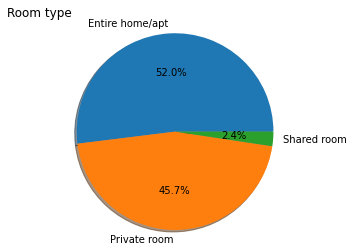

In [26]:
labels = ['Entire home/apt','Private room','Shared room']
values = airbnb_df['room_type'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=None, labels=labels, autopct='%1.1f%%',shadow=True, startangle=360)
ax1.axis('equal')
plt.title('Room type',loc='left')
plt.show()

In the above Airbnb dataset 52.0% people prefer Entire home/apt type room for their privacy and 45.7% people prefer Private room and only 2.4% people prefer Shared room.